## 一、大模型开发项目实践</center>

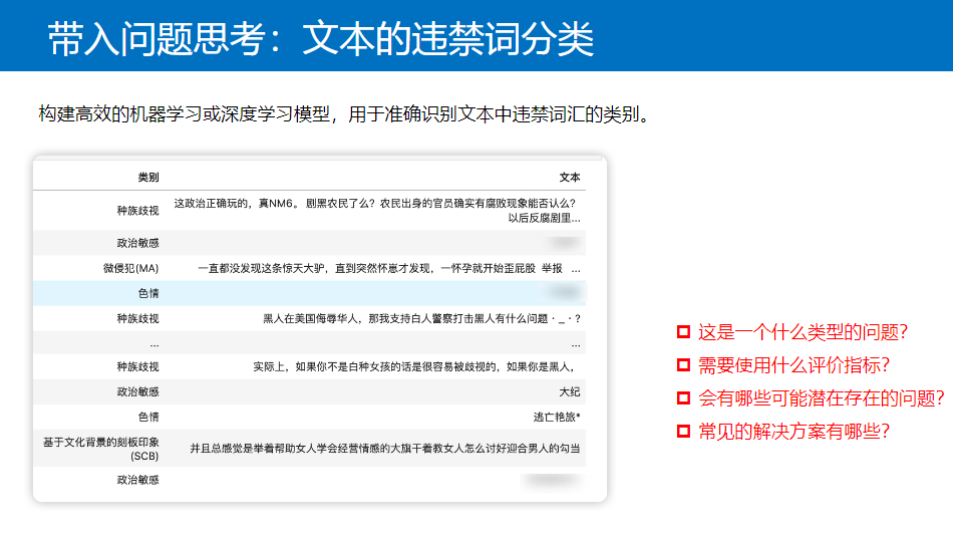
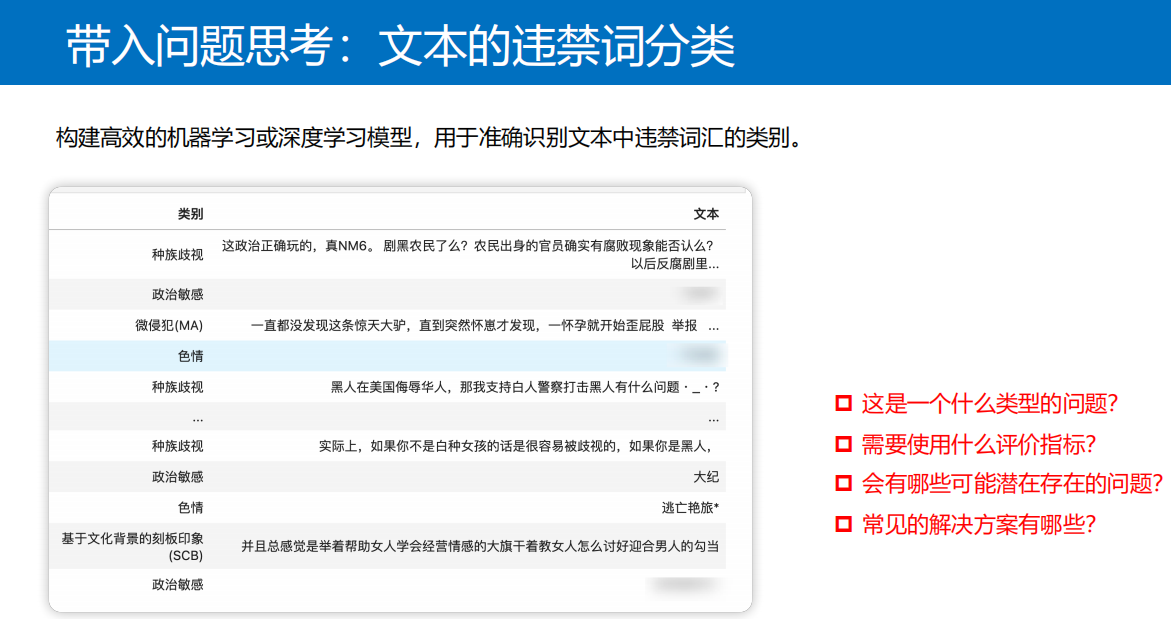

In [1]:
import pandas as pd
if __name__=='__main__':
    data=pd.read_csv("./dataset.csv",sep="\t",names=["text","label"],nrows=None)
    print(data.head(10))
    print("数据集的样本维度",data.shape)
    print(data["label"].value_counts())




                       text          label
0         还有双鸭山到淮阴的汽车票吗13号的   Travel-Query
1                   从这里怎么回家   Travel-Query
2          随便播放一首专辑阁楼里的佛里的歌     Music-Play
3                 给看一下墓王之王嘛  FilmTele-Play
4     我想看挑战两把s686打突变团竞的游戏视频     Video-Play
5       我想看和平精英上战神必备技巧的游戏视频     Video-Play
6  2019年古装爱情电视剧小女花不弃的花絮播放一下     Video-Play
7        找一个2004年的推理剧给我看一会呢  FilmTele-Play
8            自驾游去深圳都经过那些地方啊   Travel-Query
9        给我转播今天的女子双打乒乓球比赛现场     Video-Play
数据集的样本维度 (12100, 2)
label
FilmTele-Play            1355
Video-Play               1334
Music-Play               1304
Radio-Listen             1285
Alarm-Update             1264
Weather-Query            1229
Travel-Query             1220
HomeAppliance-Control    1215
Calendar-Query           1214
TVProgram-Play            240
Audio-Play                226
Other                     214
Name: count, dtype: int64


In [3]:
##jieba的使用
import jieba
jieba.add_word("机器学习")
print(jieba.lcut("我今天学习机器学习很开心"))

['我', '今天', '学习', '机器学习', '很', '开心']


In [4]:
##用来做词频统计，导入knn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
dataset=pd.read_csv("./dataset.csv",sep="\t",header=None,nrows=None)
print(dataset.head(10))
# 提取文本的特征 tfidf,dataset[0]
# 构建一个knn模型，学习提取标签的特征和关系
# 预测用户输入的一个文本，进行预测结果
input_sentence=dataset[0].apply(lambda x: " ".join(jieba.lcut(x)))##中文处理
vector = CountVectorizer()##对文本进行提取特征，默认使用标点符号分词，不是模型
vector.fit(input_sentence.values)##统计词表
input_feature = vector.transform(input_sentence.values)#100*词表大小
model = KNeighborsClassifier()#Knn模型训练
model.fit(input_feature,dataset[1].values)
print(model)

test_query="替我播放一下郭德纲的小品"    ##模型推理
test_sentence=" ".join(jieba.lcut(test_query))
test_feature=vector.transform([test_sentence])
print("待测文本",test_query)
print("Knn模型的预测结果",model.predict(test_feature))

                          0              1
0         还有双鸭山到淮阴的汽车票吗13号的   Travel-Query
1                   从这里怎么回家   Travel-Query
2          随便播放一首专辑阁楼里的佛里的歌     Music-Play
3                 给看一下墓王之王嘛  FilmTele-Play
4     我想看挑战两把s686打突变团竞的游戏视频     Video-Play
5       我想看和平精英上战神必备技巧的游戏视频     Video-Play
6  2019年古装爱情电视剧小女花不弃的花絮播放一下     Video-Play
7        找一个2004年的推理剧给我看一会呢  FilmTele-Play
8            自驾游去深圳都经过那些地方啊   Travel-Query
9        给我转播今天的女子双打乒乓球比赛现场     Video-Play
KNeighborsClassifier()
待测文本 替我播放一下郭德纲的小品
Knn模型的预测结果 ['FilmTele-Play']


In [7]:
## 11_文本分类
import jieba
from openai import OpenAI
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

dataset=pd.read_csv("./dataset.csv",sep="\t",header=None,nrows=None)
input_sentence=dataset[0].apply(lambda x: " ".join(jieba.lcut(x)))##中文处理
vector = CountVectorizer()##对文本进行提取特征，默认使用标点符号分词，不是模型
vector.fit(input_sentence.values)##统计词表
input_feature = vector.transform(input_sentence.values)#100*词表大小
model = KNeighborsClassifier()#Knn模型训练
model.fit(input_feature,dataset[1].values)

def text_classify_ml(text:str)-> str:
    """
    文本分类(机器学习)，输入文本实现类别划分
    """
    test_sentence=" ".join(jieba.lcut(text))
    test_feature = vector.transform([test_sentence])
    return model.predict(test_feature)[0]

def text_classify_llm(text:str)-> str:
    """
    文本分类(大模型)，输入文本实现类别划分
    """
    client = OpenAI(
    api_key="sk-bdfb5891d156408bb2f6a1846aa7f6c5",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1"
,
    )
    completion=client.chat.completions.create(
    model="qwen-flash",
    messages=[
        {"role": "user","content":
            f"""帮我进行文本分类：{text}
            输出的类别只能从如下进行选择：
                FilmTele-Play
                Video-Play
                Music-Play
                Radio-Listen
                Alarm-Update
                Weather-Query
                Travel-Query
                HomeAppliance-Control
                Calendar-Query
                TVProgram-Play
                Audio-Play
                Other  """},]
    )
    return completion.choices[0].message.content

if __name__=='__main__':
    print(text_classify_ml("帮我播放一下郭德纲的小品"))
    print(text_classify_llm("帮我导航到天安门"))

FilmTele-Play
Travel-Query


In [8]:
##调用大模型示例
from openai import OpenAI
client = OpenAI(
    api_key="sk-bdfb5891d156408bb2f6a1846aa7f6c5",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1"

)
completion=client.chat.completions.create(
    model="qwen-flash",
    messages=[
        {"role": "system","content": "You are a helpful assistant"},
        {"role": "user","content": "你是谁"},
        {"role": "user","content": "齐天大圣是谁"},
    ]
)
print(completion.choices[0].message.content)

我是通义千问（Qwen），是阿里巴巴集团旗下的通义实验室自主研发的超大规模语言模型。我能够回答问题、创作文字，比如写故事、写公文、写邮件、写剧本、逻辑推理、编程等等，还能表达观点，玩游戏等。

齐天大圣是《西游记》中的一个重要角色，本名孙悟空。他是一只从石头中诞生的猴子，后来修炼成仙，拥有七十二变、筋斗云等神通。他因大闹天宫被如来佛祖镇压在五行山下五百年，后被唐僧救出，成为其徒弟，保护唐僧西天取经。在取经途中，孙悟空勇猛机智，降妖除魔，立下赫赫战功。他性格桀骜不驯却又忠诚勇敢，是中国古典文学中最受欢迎的角色之一。


In [10]:
##Fastapi部署
from typing import Union
from fastapi import FastAPI

app = FastAPI()
@app.get("/")
def read_root():
    return {"Hello": "World"}
@app.get("/items/{item_id}")
def read_item(item_id: int, q: Union[str,None]=None):
    return {"item_id": item_id, "q": q}